# Logistic Regression on Iris-Virginica
----------
### Step (1): Environment Setup
In order to find out, if the Iris given by it's properties *[ 4.8,2.5,5.3,2.4 ]* is an *Iris-Virginica*, let's setup the environment first:

In [1]:
%matplotlib inline
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# load the iris data set
iris = datasets.load_iris()

----------
### Step (2): Examing the Iris data set
The Iris data set contains the folliing keys to retrieve information from:

In [2]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

... and contains the following features:

In [3]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

----------
### Step (3): Feature Regression Curves
Now that we know what the iris data set consists of, we need to find out what features we can actually use for our regression.<br />
For this purpose, we will split up all features from the iris data set and examine them seperately. <br />
For this, lets define our dependent variable **`y`** first, <br />
which we will get from the *`target`* section from the Iris data set.<br />
Our selection will be whether a target entry is an *Iris Virginica* (value **`2`** in the Iris data set in this case) or not.<br />
The result will be an arry giving us the information if an entry is an *Iris Virginica* or not `[1=yes, 0=no]`:

In [4]:
y = (iris["target"] == 2).astype(np.int)

Now let's create the training data set from each feature.<br />
For this purpose, we select all the data from our four identified features *`sepal legth`*, *`sepal width`*, *`petal length`* and *`petal width`*<br /> 
and combine thos data sets into one Array:

In [5]:
X = np.empty(shape=(4, 150, 1))
X[0] = iris['data'][:, 0:1].reshape(-1, 1) # sepal length data
X[1] = iris['data'][:, 1:2].reshape(-1, 1) # sepal width data
X[2] = iris['data'][:, 2:3].reshape(-1, 1) # petal length data
X[3] = iris['data'][:, 3:4].reshape(-1, 1) # petal width data

In our next step, we are going to train our *Logistic Regression* models - one model per feature -,<br />
using the target **`y`** as our dependent variable and each feature's data set stored in **`X`**:

In [6]:
# define logistic regression instances for each feature
log_regs = np.array([\
    LogisticRegression(),\
    LogisticRegression(),\
    LogisticRegression(),\
    LogisticRegression()\
])
# trigger 'leaerning' process for each feature
for i in range(0, X.shape[0]):
    x = X[i]
    log_regs[i].fit(x, y)

Having all *Logistic Regression models* trained,<br /> 
let's determine the minimum and maximum for each feature,<br />
in order to create correct testing samples from those ranges:

In [7]:
X_minmax = np.empty(shape=(4,2))
for i in range(0, X.shape[0]):
    X_minmax[i] = np.array([X[i].min(), X[i].max()])
X_minmax

array([[4.3, 7.9],
       [2. , 4.4],
       [1. , 6.9],
       [0.1, 2.5]])

Now that we have all feature minima and maxima in place,<br />we can calulcate samples for each feature mathing those bounds (`1000 samples` per feature range):

In [8]:
sample_size = 1000
X_samples = np.empty(shape=(4, 1000, 1))
for i in range(0, X_minmax.shape[0]):
    X_samples[i] = np.linspace(np.floor(X_minmax[i][0]), np.ceil(X_minmax[i][1]), sample_size).reshape(-1, 1)

With all those feature samples calculated, we can move further<br />
and calculate the target probabilities for each feature-sample set, <br />
matching the case that the dependent variable **`y`** is `True` (remember: we want to determine if the given Iris is an *Iris-Virginica*)

In [9]:
y_probs = np.empty(shape=(4, 1000, 2))
for i in range(0, log_regs.shape[0]):
    samples = X_samples[i]
    log_reg = log_regs[i]
    y_probs[i] = log_reg.predict_proba(samples)

At this point we are almost finished, to find out what features we can use for our final regression. We have everything calculated so far being able<br />
to draw our diagrams visualizing the regression curve for each feature:

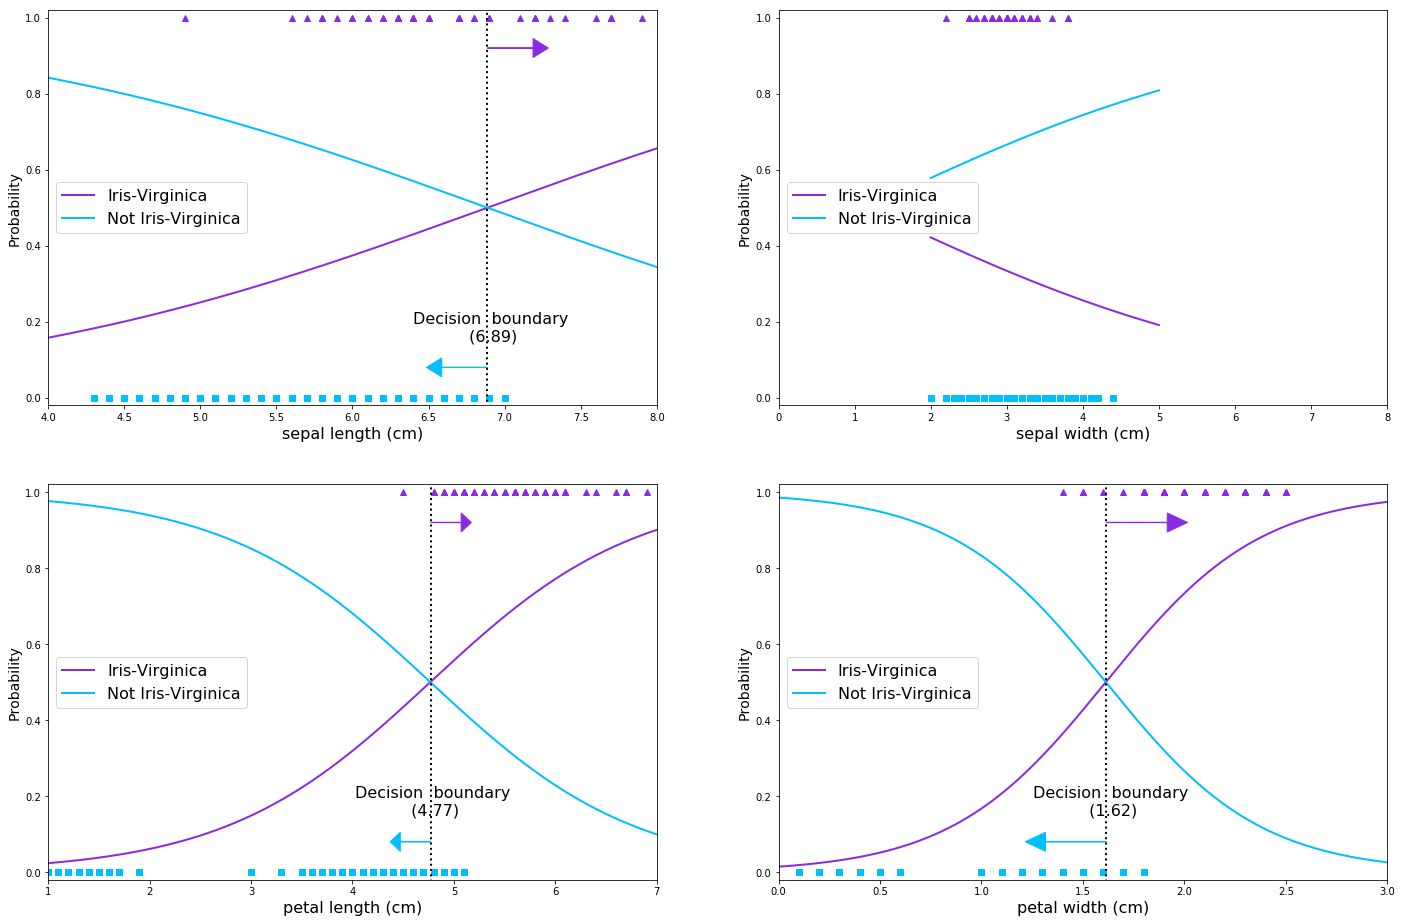

In [10]:
plt.figure(figsize=(24, 16))

y_test = (iris["target"] == 2).astype(np.int)

for i in range(0, len(iris['feature_names'])):
    boundary_samples = X_samples[i][y_probs[i][:, 1] >= 0.5]
    decision_boundary = 0
    x_axis_min = np.floor(X_minmax[i][0])
    x_axis_max = np.ceil(X_minmax[i][1])
        
    plt.subplot(2, 2, i+1)
    plt.plot(X[i][y_test==1], y_test[y_test==1], marker='^', color='blueviolet', linestyle='None') # markers for Iris-Virginica
    plt.plot(X[i][y_test==0], y_test[y_test==0], marker="s", color='deepskyBlue', linestyle='None') # markers for NO Iris-Virginica
    plt.plot(X_samples[i], y_probs[i][:, 1], color='blueviolet', linewidth=2, label='Iris-Virginica')
    plt.plot(X_samples[i], y_probs[i][:, 0], 'deepskyblue', linewidth=2, label='Not Iris-Virginica')
    
    # determine if we have a decision boundary available
    if (len(boundary_samples) > 0):
        decision_boundary = boundary_samples[0]
        plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
        plt.text(decision_boundary+0.02, 0.15, 'Decision  boundary\n (%.2f)' % decision_boundary, fontsize=16, color="k", ha="center")
        plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='blueviolet', ec='blueviolet')
        plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='deepskyBlue', ec='deepskyBlue')
    else:
        # no decision boundary available --> align axis to better illustrate that both curves don't intersect
        x_axis_min = 0
        x_axis_max = 8
    
    plt.axis([x_axis_min, x_axis_max, -0.02, 1.02])
    plt.legend(loc='center left', fontsize=16)
    plt.xlabel(iris['feature_names'][i], fontsize=16)
    plt.ylabel('Probability', fontsize=14)

The diagrams above indicate that - except for the feature *`sepal width`* - have a dicision boundary.<br />
This means, that we can make predictions on the features *`sepal length`*, *`sepal width`* and <br />
*`petal length`* whether the Iris **`[4.8, 2.5, 5.3, 2.4]`** is an *Iris-Virginica* or not:

-------------
### Step (4): Performing the actual Regression
Now that we know what features we can use for our regression, let's re-define our dependent variable **`y`** as well as the training data set **`X`**, which will include the features *`sepal length`*, *`sepal width`* and *`petal length`*: 

In [11]:
y = iris.target
X = np.column_stack((iris.data[:, 0:2], iris.data[:, 3:4]))
X[0:5, :]

array([[5.1, 3.5, 0.2],
       [4.9, 3. , 0.2],
       [4.7, 3.2, 0.2],
       [4.6, 3.1, 0.2],
       [5. , 3.6, 0.2]])

With this information in place, we can perform our regression on the given<br />
Iris sample ***`[4.8, 2.5, 5.3, 2.4]`*** which we want to classify:

In [12]:
# instantiate the Logistic Regression classifier
log_reg_classifier = LogisticRegression()
log_reg_classifier.fit(X, y)

# instantiate the Iris Sample [4.8, 2.5, 5.3, 2.4] leaving the 5.3 (sepal width)
iris_sample = np.array([4.8, 2.5, 2.4]).reshape(1, -1)
iris_sample

array([[4.8, 2.5, 2.4]])

Having the regression classifier as well as the the Iris Sample to be examined instantiated, we can now calculate the probabilities for this sample:

In [13]:
iris_sample_probs = log_reg_classifier.predict_proba(iris_sample)
iris_sample_probs

array([[0.00218915, 0.17237194, 0.82543891]])

... and can retrieve a prediction from the Logistic Regression classifier what Iris class the sample might be:

In [14]:
sample_predicition = log_reg_classifier.predict(iris_sample)
sample_predicition

array([2])

------
### Result of Validation
So let's give an answer if the Iris defined by it's properties ***`[4.8, 2.5, 5.3, 2.4]`*** an *Iris-Virginica*?

In [15]:
# compare predictions for sepal length, petal length and petal width
# <-- sepal width has no decision boundary, so the sepal width has no evidence in making any decision here
predicted_sample_class_name = iris.target_names[int(sample_predicition[0])]
predicted_sample_class_name

'virginica'

### ==> YES, the given Iris is an *Iris-Virginica*